# Solving a Refression Problem using ANN:

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.getcwd()

'/content'

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
housing  = fetch_california_housing()

In [5]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
X = pd.DataFrame(housing.data , columns = housing.feature_names)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
y = pd.DataFrame(housing.target , columns =['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [10]:
X.shape

(20640, 8)

In [11]:
y.shape

(20640, 1)

In [14]:
X.drop(['Latitude', 'Longitude'], axis=1 , inplace = True)

In [15]:
X_train_full,X_test, y_train_full , y_test = train_test_split(X,y, random_state=42)
X_train , X_valid , y_train , y_valid = train_test_split(X_train_full , y_train_full, random_state=42) 

In [16]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 6)
(5160, 6)
(11610, 6)
(3870, 6)


In [17]:
X_train.shape[1]

6

In [19]:
LAYERS = [
    tf.keras.layers.Dense(30,activation='relu', input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1)
]

In [20]:
model = tf.keras.models.Sequential(LAYERS)

In [21]:
LOSS = 'mse'
OPTIMIZER = 'sgd'

model.compile(optimizer = OPTIMIZER , loss = LOSS)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [24]:
EPOCHS = 20

history = model.fit(X_train,y_train , epochs = EPOCHS , validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8137 - val_loss: 0.4941
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4955 - val_loss: 0.6412
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4678 - val_loss: 0.5346
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4557 - val_loss: 0.5011
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4456 - val_loss: 0.5554
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4364 - val_loss: 0.4382
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4353 - val_loss: 0.4135
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4355 - val_loss: 0.4313
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4311 - val_loss: 0.4334
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4293 - val_loss: 0.4444

In [25]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.813671,0.494121
1,0.495468,0.641233
2,0.467775,0.534647
3,0.455651,0.501054
4,0.445620,0.555380
5,0.436375,0.438189
6,0.435259,0.413513
7,0.435463,0.431350
8,0.431138,0.433358
9,0.429257,0.444391


<Axes: >

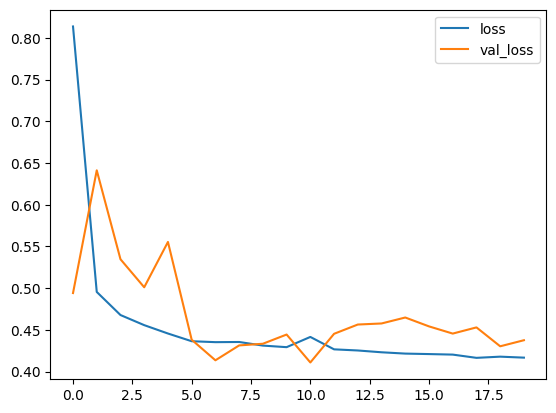

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 5ms/step - loss: 0.4191


0.4191034436225891

In [28]:
X_test.shape

(5160, 6)

In [29]:
new = X_test[0]

In [30]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [31]:
new.shape

(6,)

In [32]:
#reshaping is done because the model only accepts x rows with 6 columns.
#So for 1 row the shape should be (1,6)
new.reshape((1,6)).shape

(1, 6)

In [33]:
model.predict(new.reshape((1,6)))

1/1 [==============================] - 0s 260ms/step


array([[0.87603086]], dtype=float32)

In [36]:
y_test.iloc[0]

target    0.477
Name: 20046, dtype: float64

In [43]:
%load_ext tensorboard

In [37]:
model_2 = tf.keras.models.Sequential(LAYERS)
LOSS = 'mse'
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS,optimizer=OPTIMIZER)


In [46]:
EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5" , save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = 'logs')

CALLBACKS = [checkpoint_cb,early_stopping_cb,tensorboard_cb]

history = model_2.fit(X_train,y_train , epochs = EPOCHS , validation_data=(X_valid,y_valid),callbacks=CALLBACKS)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4029 - val_loss: 0.4190
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4029 - val_loss: 0.4216
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4031 - val_loss: 0.4196
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4029 - val_loss: 0.4182
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4028 - val_loss: 0.4185
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4025 - val_loss: 0.4191
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4027 - val_loss: 0.4276
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4026 - val_loss: 0.4174
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4026 - val_loss: 0.4181
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4024 - val_loss: 0.4229

In [62]:
!kill 16577

/bin/bash: line 0: kill: (16577) - No such process


In [64]:
%tensorboard --logdir logs/train

Reusing TensorBoard on port 6006 (pid 17357), started 0:02:12 ago. (Use '!kill 17357' to kill it.)

<IPython.core.display.Javascript object>